In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import osmnx as ox

import os
print(os.getcwd())

import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/max/sync/cornell/2021_FA_Final_Project/spoke/notebooks/maxdumas


In [2]:
from spoke.graphing import SO_34_POLY, clip_northern_edge
from spoke.datasets import load_consolidated_mnh_below_34th, load_danger_df

# Danger Metric Associations

Let's start by just computing the average danger for each census tract.

In [3]:
danger_df = load_danger_df()

In [4]:
G = load_consolidated_mnh_below_34th()

We load the raw census tract shapefile.

In [5]:
tract_gdf = gpd.read_file('../../data/2010_Census_Tracts/geo_export_85c202c5-6ec9-493e-b0ec-a13efa26758d.shp')

In [ ]:
ns = clip_northern_edge(
    ox.utils_graph.graph_to_gdfs(G, edges=False).to_crs('EPSG:4326'),
    0.001
)

In [7]:
danger_by_tract_df = danger_df.loc[ns.index].groupby('CENSUS_TRACT_ID').mean()
danger_by_tract_df

,DANGER
CENSUS_TRACT_ID,
201,1.869849
202,2.457475
600,3.391251
700,1.900318
800,2.622768
...,...
10100,3.034775
10300,2.777648
31703,0.733920


In [8]:
tract_gdf['ct2010'] = tract_gdf['ct2010'].apply(int)
tract_danger_gdf = tract_gdf.query('boro_code == "1"').merge(danger_by_tract_df, how='inner', left_on='ct2010', right_index=True)
tract_danger_gdf

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,DANGER
485,1,1003001,Manhattan,E,3001,30.01,MN27,Chinatown,3809,1.344751e+06,4758.460704,"POLYGON ((-73.98382 40.72147, -73.98386 40.721...",2.971468
490,1,1001600,Manhattan,I,1600,16,MN27,Chinatown,3809,2.233320e+06,6391.788519,"POLYGON ((-73.98915 40.71671, -73.98975 40.715...",2.609471
569,1,1005501,Manhattan,I,5501,55.01,MN23,West Village,3810,1.338497e+06,4650.767227,"POLYGON ((-73.99657 40.72955, -73.99581 40.729...",1.401355
643,1,1007200,Manhattan,I,7200,72,MN20,Murray Hill-Kips Bay,3808,1.877429e+06,5722.943809,"POLYGON ((-73.97764 40.74639, -73.97812 40.745...",3.163063
651,1,1007400,Manhattan,I,7400,74,MN17,Midtown-Midtown South,3807,1.879420e+06,5726.157402,"POLYGON ((-73.98085 40.74775, -73.98134 40.747...",3.251057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1,1005502,Manhattan,I,5502,55.02,MN23,West Village,3810,1.243017e+06,4547.016128,"POLYGON ((-73.99155 40.72709, -73.99157 40.727...",2.493786
1973,1,1002400,Manhattan,E,2400,24,MN28,Lower East Side,3809,1.862478e+06,9194.919307,"MULTIPOLYGON (((-73.96715 40.71832, -73.96656 ...",2.195455
2033,1,1001501,Manhattan,I,1501,15.01,MN25,Battery Park City-Lower Manhattan,3810,2.814416e+06,9128.748152,"MULTIPOLYGON (((-73.99502 40.70315, -73.99505 ...",1.960174
2036,1,1000700,Manhattan,I,700,7,MN25,Battery Park City-Lower Manhattan,3810,2.439446e+06,9763.042777,"MULTIPOLYGON (((-73.99800 40.69880, -73.99802 ...",1.900318


<AxesSubplot:>

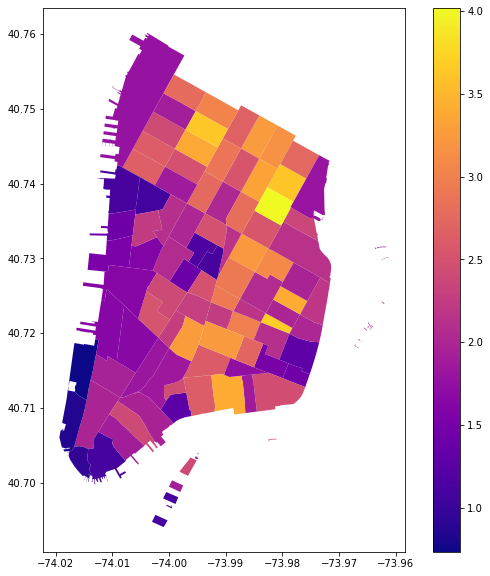

In [9]:
tract_danger_gdf.plot(column='DANGER', cmap='plasma', legend=True, figsize=(10, 10))